In [1]:
# Import libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# check torch verison
torch.__version__

'1.12.1'

In [2]:
# create device agnostic code: if gpu available, use gpu else cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Data

In [3]:
# create data for linear regression problem
weight = 0.7
bias = 0.3

# create the input values and output values
X = torch.arange(start = 0, end = 1, step = 0.02).unsqueeze(dim=1)
Y = weight*X + bias

## Split the data

In [4]:
train_split = int(0.8* len(X))

X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

# check the length of training and test set
len(X_train), len(X_test)

(40, 10)

## Plot the data

In [5]:
def plot_predications (train_data = X_train,
                       train_labels = Y_train,
                       test_data = X_test,
                       test_labels = Y_test,
                       predications = None):
    """
    plotting the training data, test data and compares predications
    """
    plt.figure(figsize=(10,7))
    
    # plot training data 
    plt.scatter(train_data, train_labels, c="b", s=4, label= "Training Data")
    
    # plot testing data
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")
    
    if predications is not None:
        # plot the predications
        plt.scatter(test_data, predications, c="r", s=4, label = "Predications")
    
    # show legends
    plt.legend(prop={"size": 14})
    

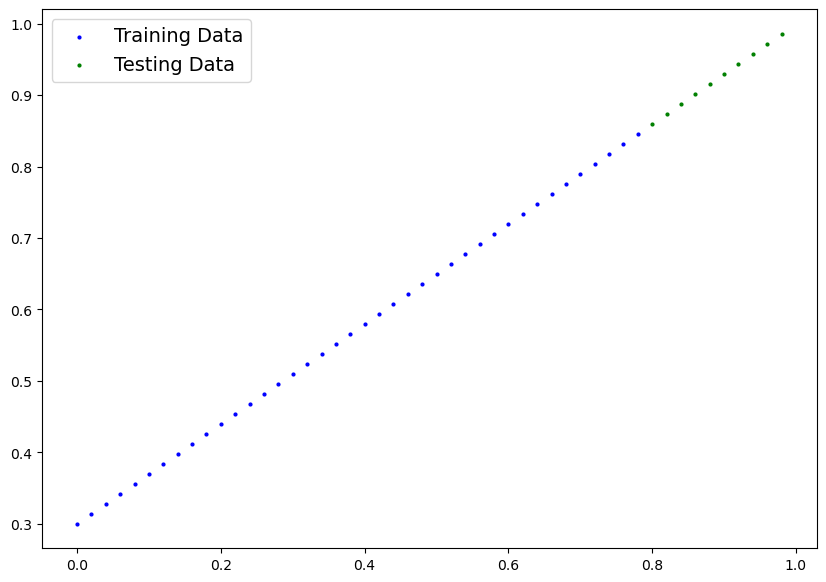

In [6]:
plot_predications(X_train, Y_train)

## Build the PyTorch Model
**`Documentation`**: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [7]:
# create a linear model by subclassing nn.Module
class LinearRegression(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # create a linear layer using nn.Linear()
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
        
    # override the forward method
    def forward(self, x: torch.Tensor)-> torch.Tensor:
        return self.linear_layer(x)

In [8]:
# set the manual seed
torch.manual_seed(42)
model = LinearRegression()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## Set the Model on GPU

In [9]:
next(model.parameters()).device # current device

device(type='cpu')

In [10]:
# set the model to use the target device --> meaning load the model on the device
model.to(device)
next(model.parameters()).device # current device

device(type='cuda', index=0)

## Training 
We need following things for training :
* **loss function**
* **optimizer**
* **training loop**
* **testing loop**

In [11]:
# set the loss function
loss_fnx = nn.L1Loss()

# set the optimizer
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr= 0.01)

In [17]:
# Let's write the training loop
torch.manual_seed(42)
epochs = 200

epoch_count = []
train_loss_list = []
test_loss_list = []

# put the data on the target device
X_train = X_train.to(device)
Y_train = Y_train.to(device)

X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
    # set the model on training mode
    model.train()
    
    # forward pass
    Y_preds = model(X_train)
    
    # calculate loss
    train_loss = loss_fnx(Y_preds, Y_train)
    
    # zero-out the optimizer gradients
    optimizer.zero_grad()
    
    # backpropagation
    train_loss.backward()
    
    # take optimization step
    optimizer.step()
    
    ##-----------Testing Loop--------------##
    # set the model in evaluation mode
    model.eval()
    
    with torch.inference_mode():
        test_preds = model(X_test)
        
        # calculate the test loss
        test_loss = loss_fnx(test_preds, Y_test)
    
    # print out the training and testing stats
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_list.append(torch.Tensor(train_loss))
        test_loss_list.append(test_loss)
        
        print(f"Epoch: {epoch}   || train_loss: {train_loss}   || test_loss: {test_loss}")

Epoch: 0   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 10   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 20   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 30   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 40   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 50   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 60   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 70   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 80   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 90   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 100   || train_loss: 0.0012645035749301314   || test_loss: 0.013801801018416882
Epoch: 110   || train_loss: 0.0012645035749301314   ||

In [13]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [14]:
## plot the predications
model.eval()

# make predication on test data
with torch.inference_mode():
    new_preds = model(Y_test)

new_preds

tensor([[0.9018],
        [0.9115],
        [0.9213],
        [0.9310],
        [0.9408],
        [0.9505],
        [0.9603],
        [0.9701],
        [0.9798],
        [0.9896]], device='cuda:0')

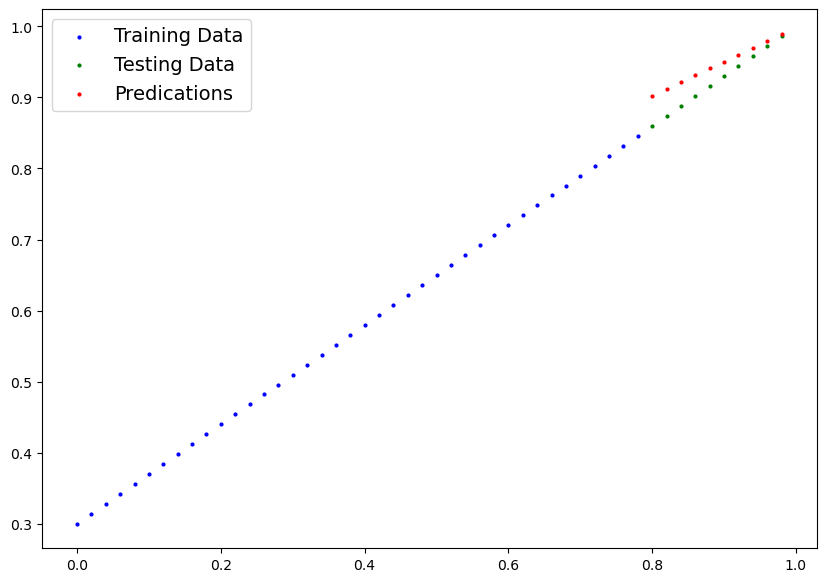

In [18]:
plot_predications(predications=torch.Tensor(new_preds).cpu().numpy())